In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Traffic_Data.csv')

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,02/03/2024,0,I,1927,453
1,21,02/03/2024,1,I,1274,369
2,21,02/03/2024,2,I,1011,246
3,21,02/03/2024,3,I,959,241
4,21,02/03/2024,4,I,1291,301


In [ ]:
df.columns

Index(['Plaza ID', 'Date', 'Hour', 'Direction', '# Vehicles - E-ZPass',
       '# Vehicles - VToll'],
      dtype='object')

In [ ]:
df['Total'] = df['# Vehicles - VToll'] + df['# Vehicles - E-ZPass']
df['Date'] = pd.to_datetime(df['Date'])
df['DoW'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.week
df.head()

<ipython-input-3-9d14308890ec>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Total,DoW,Month,Year,Week
0,21,2024-02-03,0,I,1927,453,2380,Saturday,2,2024,5
1,21,2024-02-03,1,I,1274,369,1643,Saturday,2,2024,5
2,21,2024-02-03,2,I,1011,246,1257,Saturday,2,2024,5
3,21,2024-02-03,3,I,959,241,1200,Saturday,2,2024,5
4,21,2024-02-03,4,I,1291,301,1592,Saturday,2,2024,5


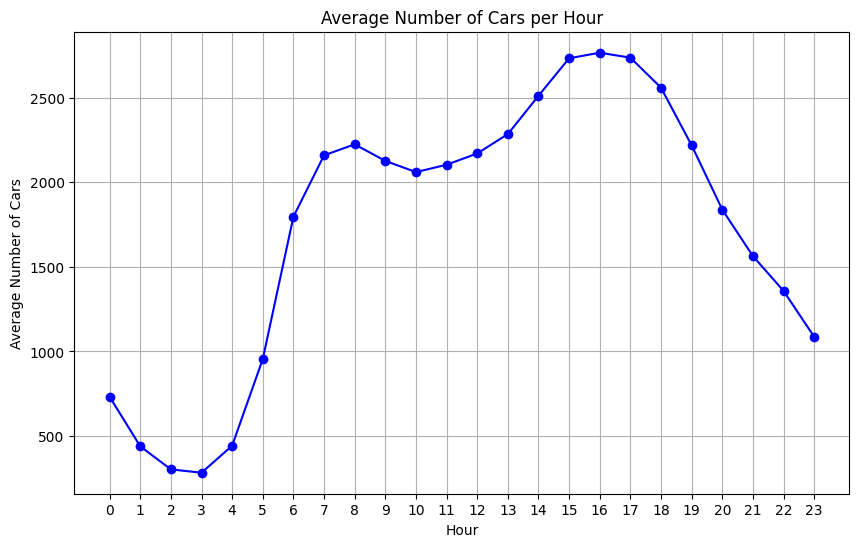

In [ ]:
avg_cars_per_hour = df.groupby('Hour')['Total'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_cars_per_hour, marker='o', color='b', linestyle='-')
plt.title('Average Number of Cars per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(24))
plt.show()

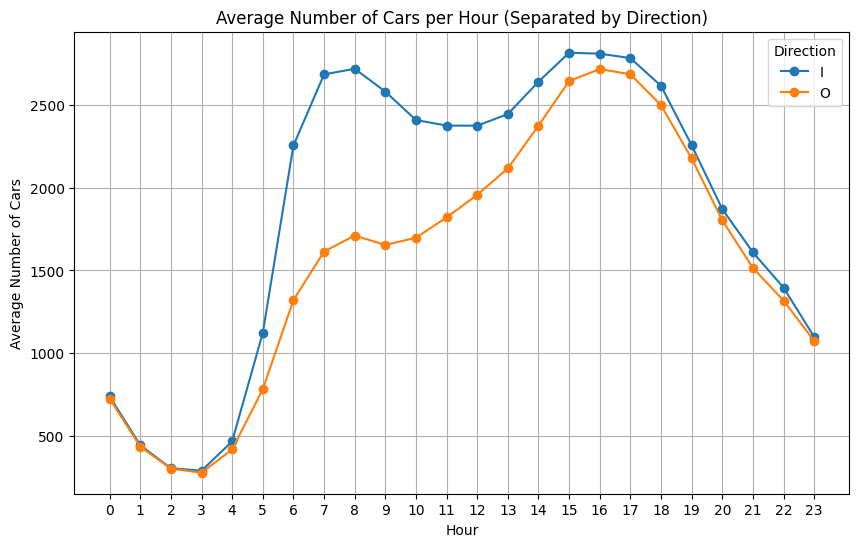

In [ ]:
unique_directions = df['Direction'].unique()

plt.figure(figsize=(10, 6))
for direction in unique_directions:
    avg_cars_per_hour_direction = df[df['Direction'] == direction].groupby('Hour')['Total'].mean()
    plt.plot(avg_cars_per_hour_direction, marker='o', linestyle='-', label=direction)

plt.title('Average Number of Cars per Hour (Separated by Direction)')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Direction')
plt.show()

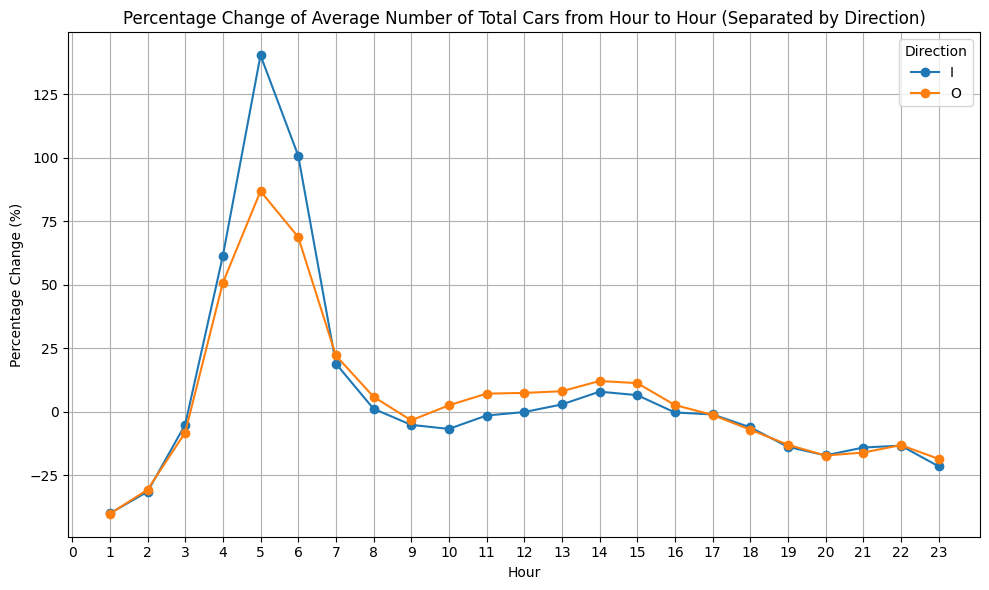

In [ ]:
avg_cars_per_hour_direction = df.groupby(['Hour', 'Direction'])['Total'].mean().unstack()

percentage_change_direction = avg_cars_per_hour_direction.pct_change() * 100

plt.figure(figsize=(10, 6))
for direction in percentage_change_direction.columns:
    plt.plot(percentage_change_direction.index, percentage_change_direction[direction], marker='o', linestyle='-', label=direction)

plt.title('Percentage Change of Average Number of Total Cars from Hour to Hour (Separated by Direction)')
plt.xlabel('Hour')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

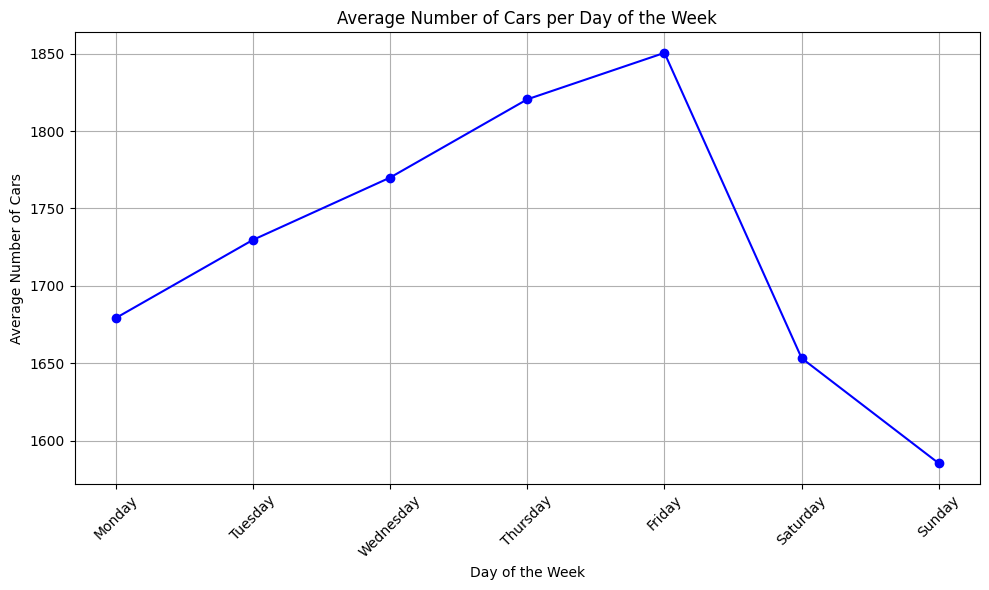

In [ ]:
avg_cars_per_day_of_week = df.groupby('DoW')['Total'].mean()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
avg_cars_per_day_of_week = avg_cars_per_day_of_week.reindex(day_order)  # Reindex to order days of the week
avg_cars_per_day_of_week.plot(marker='o', color='b', linestyle='-')
plt.title('Average Number of Cars per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

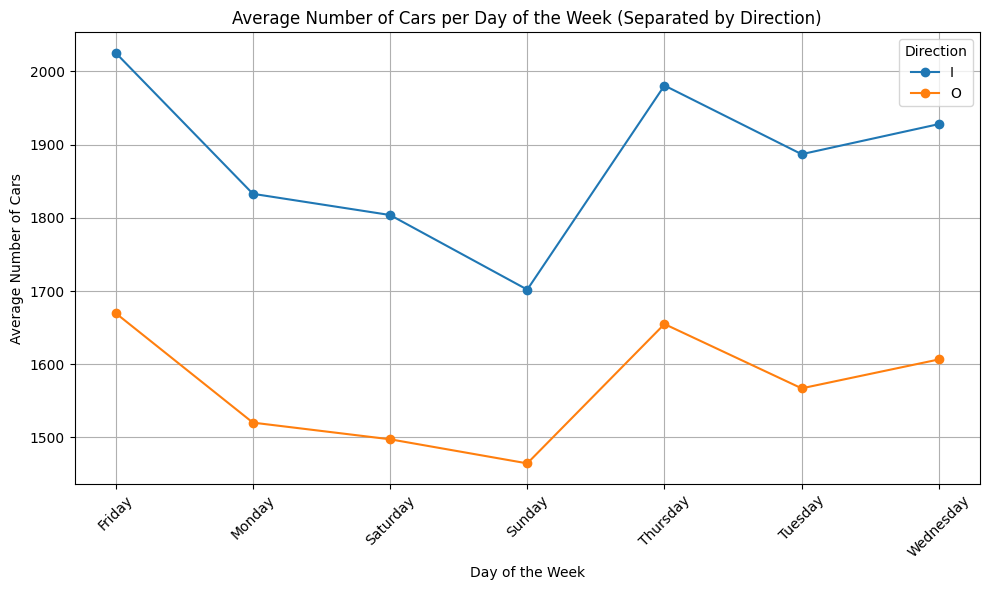

In [ ]:
avg_cars_per_day_of_week_direction = df.groupby(['DoW', 'Direction'])['Total'].mean().unstack()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
for direction in avg_cars_per_day_of_week_direction.columns:
    plt.plot(avg_cars_per_day_of_week_direction.index, avg_cars_per_day_of_week_direction[direction], marker='o', label=direction)

plt.title('Average Number of Cars per Day of the Week (Separated by Direction)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

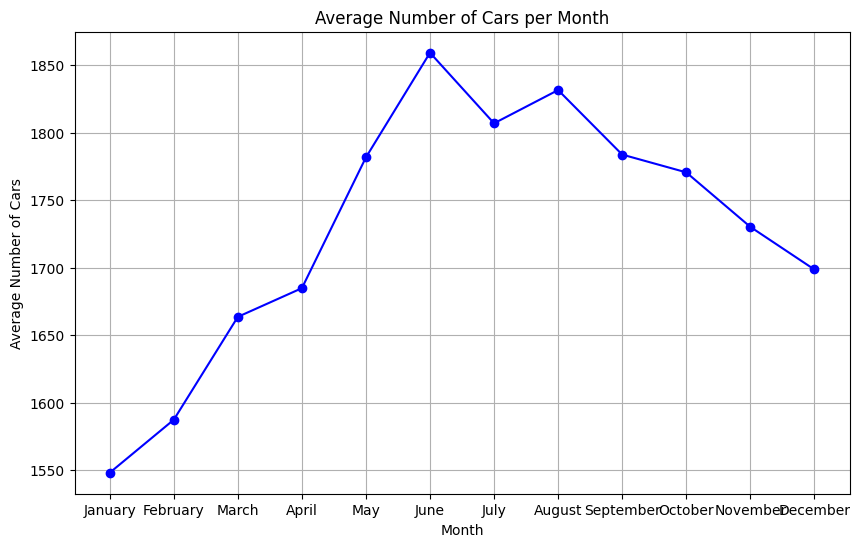

In [ ]:
avg_cars_per_month = df.groupby('Month')['Total'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
plt.plot(avg_cars_per_month, marker='o', color='b', linestyle='-')
plt.title('Average Number of Cars per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(1, 13), month_order)
plt.show()


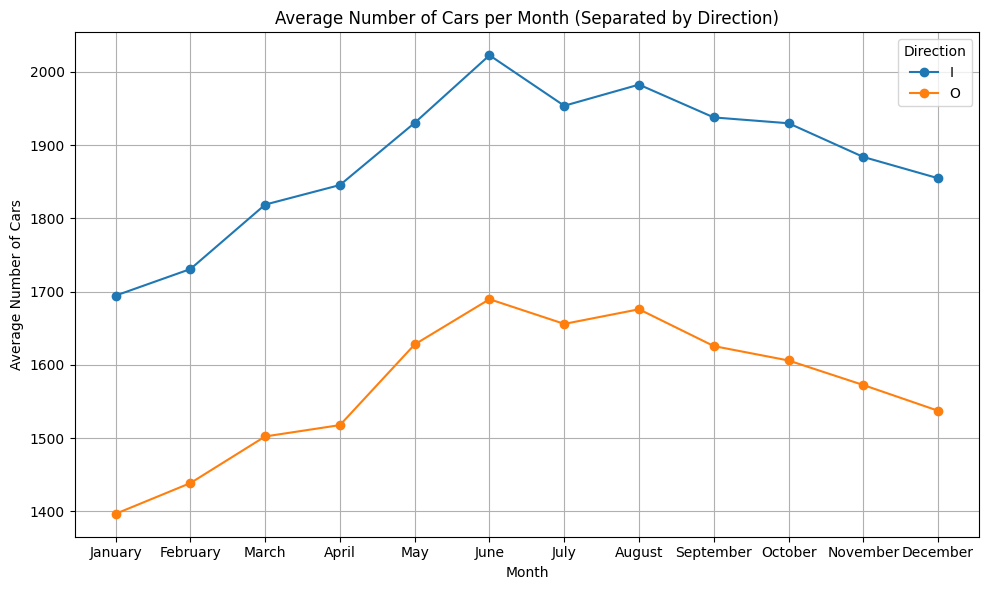

In [ ]:
avg_cars_per_month_direction = df.groupby(['Month', 'Direction'])['Total'].mean().unstack()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot separate lines for each direction
plt.figure(figsize=(10, 6))
for direction in avg_cars_per_month_direction.columns:
    plt.plot(avg_cars_per_month_direction.index, avg_cars_per_month_direction[direction], marker='o', linestyle='-', label=direction)

plt.title('Average Number of Cars per Month (Separated by Direction)')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(1, 13), month_order)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

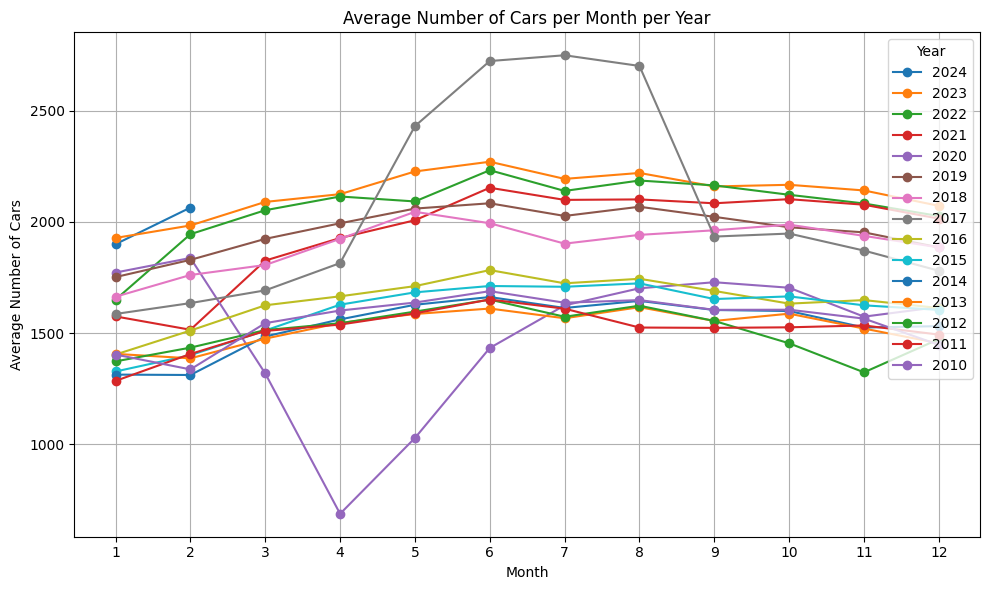

In [ ]:
avg_cars_per_month_per_year = df.groupby(['Year', 'Month'])['Total'].mean()

plt.figure(figsize=(10, 6))
for year in df['Year'].unique():
    plt.plot(avg_cars_per_month_per_year[year], marker='o', label=year)

plt.title('Average Number of Cars per Month per Year')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

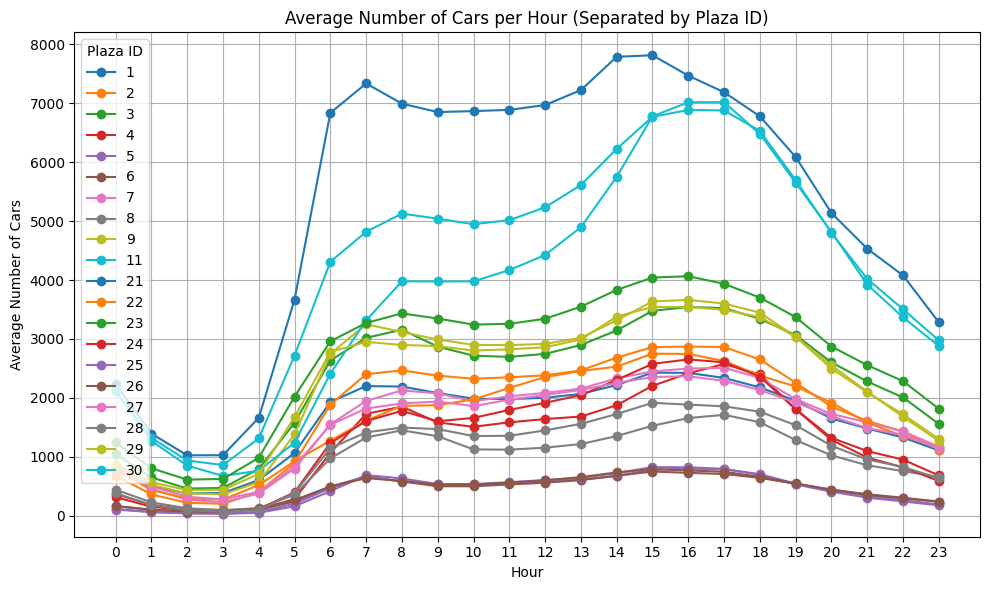

In [ ]:
avg_cars_per_hour_plaza = df.groupby(['Hour', 'Plaza ID'])['Total'].mean().unstack()

# Plot the average number of cars per hour for each Plaza ID
plt.figure(figsize=(10, 6))
for plaza_id in avg_cars_per_hour_plaza.columns:
    plt.plot(avg_cars_per_hour_plaza.index, avg_cars_per_hour_plaza[plaza_id], marker='o', linestyle='-', label=plaza_id)

plt.title('Average Number of Cars per Hour (Separated by Plaza ID)')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Plaza ID')
plt.tight_layout()
plt.show()

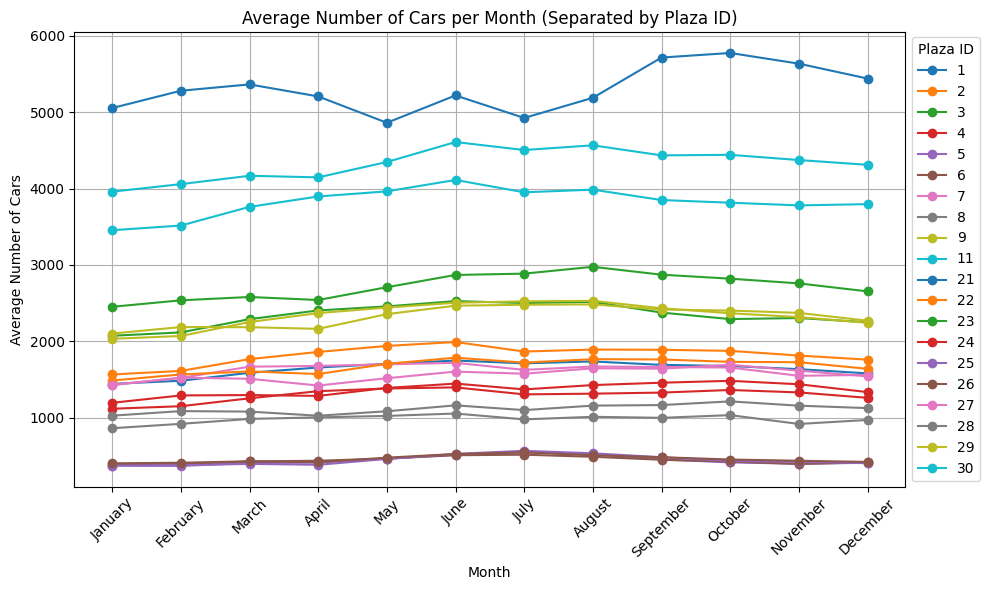

In [ ]:
avg_cars_per_month_plaza = df.groupby(['Month', 'Plaza ID'])['Total'].mean().unstack()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the average number of cars per month for each Plaza ID
plt.figure(figsize=(10, 6))
for plaza_id in avg_cars_per_month_plaza.columns:
    plt.plot(month_order, avg_cars_per_month_plaza[plaza_id], marker='o', linestyle='-', label=plaza_id)

plt.title('Average Number of Cars per Month (Separated by Plaza ID)')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Plaza ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
total_cars_per_week_year = df.groupby(['Year', 'Week'])['Total'].sum()
total_cars_per_week_year_table = total_cars_per_week_year.reset_index()

total_cars_per_week_year_table.rename(columns={'Total': 'total'}, inplace=True)

total_cars_per_week_year_table

,Year,Week,total
0,2010,1,4494491
1,2010,2,4654219
2,2010,3,4602305
3,2010,4,4551071
4,2010,5,4421794
...,...,...,...
729,2024,1,5458830
730,2024,2,5890677
731,2024,3,5560149
732,2024,4,5942234


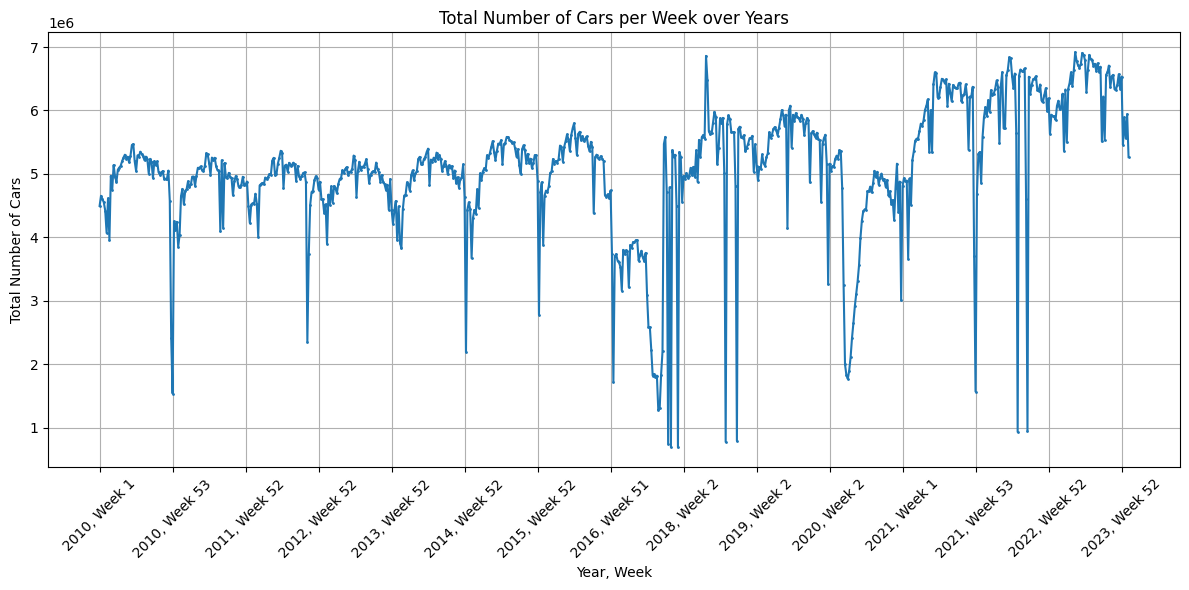

In [ ]:
total_cars_per_week_year_table['Year_Week'] = total_cars_per_week_year_table['Year'].astype(str) + ', Week ' + total_cars_per_week_year_table['Week'].astype(str)

# Plot the total number of cars per week over years
plt.figure(figsize=(12, 6))
plt.plot(total_cars_per_week_year_table['Year_Week'], total_cars_per_week_year_table['total'], marker='o', markersize=1, linestyle='-')
plt.title('Total Number of Cars per Week over Years')
plt.xlabel('Year, Week')
plt.ylabel('Total Number of Cars')
plt.xticks(rotation=45)
plt.gca().set_xticks(total_cars_per_week_year_table.index[::52])
plt.grid(True)
plt.tight_layout()
plt.show()

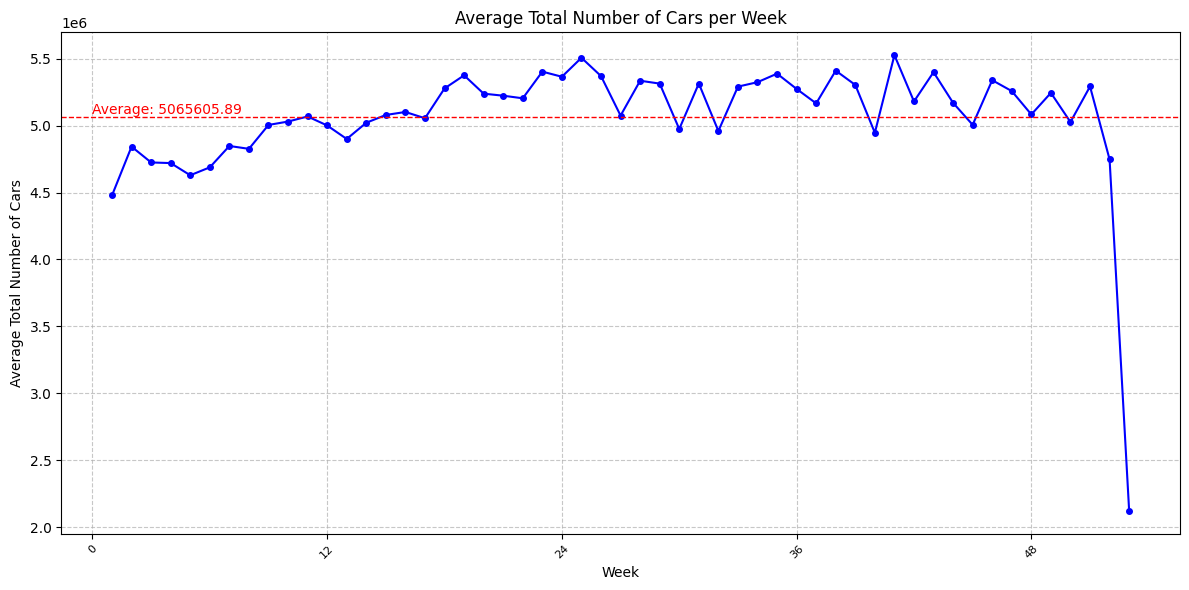

In [ ]:
avg_cars_per_week = total_cars_per_week_year_table.groupby('Week')['total'].mean().reset_index()
avg_cars_per_week.rename(columns={'total': 'Total'}, inplace=True)

# Plot the average number of cars per week
plt.figure(figsize=(12, 6))
plt.plot(avg_cars_per_week['Week'], avg_cars_per_week['Total'], marker='o', markersize=4, linestyle='-', color='blue', linewidth=1.5)

# Set plot title and labels
plt.title('Average Total Number of Cars per Week')
plt.xlabel('Week')
plt.ylabel('Average Total Number of Cars')

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().set_xticks(avg_cars_per_week.index[::12])

# Add labels to every 12th tick
plt.xticks(fontsize=8)
for label in plt.gca().xaxis.get_ticklabels()[::12]:
    label.set_visible(True)

# Add a horizontal line at the average value
plt.axhline(y=avg_cars_per_week['Total'].mean(), color='red', linestyle='--', linewidth=1)

# Annotate the average value
plt.text(0, avg_cars_per_week['Total'].mean(), f'Average: {avg_cars_per_week["Total"].mean():.2f}', color='red', ha='left', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()